<a href="https://colab.research.google.com/github/ankitmavani/Credit-Card-default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# !pip install --upgrade xlrd

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_excel("drive/MyDrive/AlmaBetter/Credit card default detection/Credit Card Data.xls",engine='xlrd',header=1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
len(df[df.duplicated()])

0

## Data Analysis

### **Sex**

,Number_Of_Data,Percentage_Of_Data
2,18112.0,60.373333
1,11888.0,39.626667


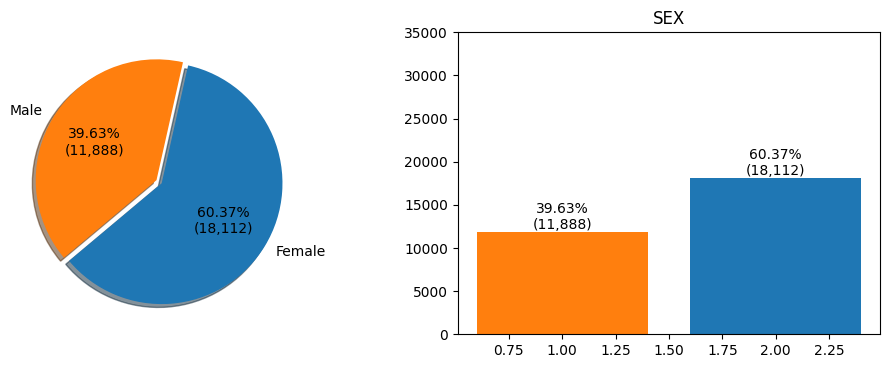

In [13]:
count_data = pd.DataFrame([df["SEX"].value_counts(),df["SEX"].value_counts(normalize=True)*100]).T
count_data.columns = ["Number_Of_Data", "Percentage_Of_Data"]

display(count_data)

fig, ax = plt.subplots(1,2,figsize= (12, 4), dpi = 100)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

explode = (0, 0.05)

ax[0].pie(
    df["SEX"].value_counts(), 
    labels = ["Female","Male"], 
    autopct = lambda pct : func(pct,df["SEX"].value_counts()), 
    shadow = True,
    startangle = 220, 
    explode = explode,
    textprops=dict(color='black')
)

plt.title("SEX")

def func1(height):
    total = len(df["SEX"])
    pct =((height * 100)/total).round(2)
    return "{:.2f}%\n({:,})".format(pct, height)

g = ax[1].bar(df["SEX"].value_counts().index,df["SEX"].value_counts(),color=["#1f77b4","#ff7f0e"])

for rect in g:
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2.0, height,func1(height),ha='center', va='bottom')

plt.ylim((0,35000))
    
plt.title("SEX")

plt.show()

### **Education**

,Number_Of_Data,Percentage_Of_Data
2,14030.0,46.766667
1,10585.0,35.283333
3,4917.0,16.390000
5,280.0,0.933333
4,123.0,0.410000
6,51.0,0.170000
0,14.0,0.046667


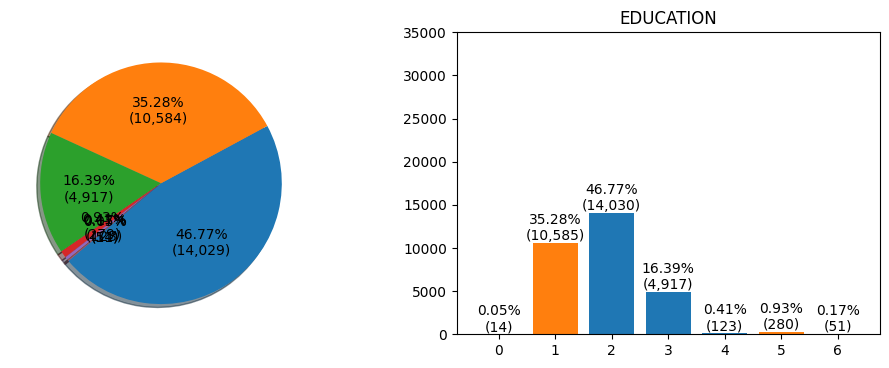

In [28]:
count_data = pd.DataFrame([df["EDUCATION"].value_counts(),df["EDUCATION"].value_counts(normalize=True)*100]).T
count_data.columns = ["Number_Of_Data", "Percentage_Of_Data"]

display(count_data)

fig, ax = plt.subplots(1,2,figsize= (12, 4), dpi = 100)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

# explode = (0,0,0, 0.05)

ax[0].pie(
    df["EDUCATION"].value_counts(), 
    # labels = ["GS","Uni","Hight","Other"], 
    autopct = lambda pct : func(pct,df["SEX"].value_counts()), 
    shadow = True,
    startangle = 220, 
    # explode = explode,
    textprops=dict(color='black')
)

plt.title("EDUCATION")

def func1(height):
    total = len(df["EDUCATION"])
    pct =((height * 100)/total).round(2)
    return "{:.2f}%\n({:,})".format(pct, height)

g = ax[1].bar(df["EDUCATION"].value_counts().index,df["EDUCATION"].value_counts(),color=["#1f77b4","#ff7f0e"])

for rect in g:
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2.0, height,func1(height),ha='center', va='bottom')

plt.ylim((0,35000))
    
plt.title("EDUCATION")

plt.show()

### **Marital status**

,Number_Of_Data,Percentage_Of_Data
2,15964.0,53.213333
1,13659.0,45.530000
3,323.0,1.076667
0,54.0,0.180000


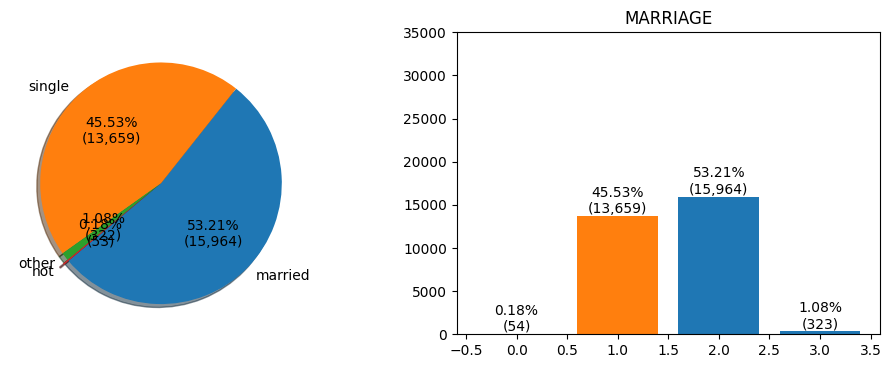

In [26]:
count_data = pd.DataFrame([df["MARRIAGE"].value_counts(),df["MARRIAGE"].value_counts(normalize=True)*100]).T
count_data.columns = ["Number_Of_Data", "Percentage_Of_Data"]

display(count_data)

fig, ax = plt.subplots(1,2,figsize= (12, 4), dpi = 100)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

explode = (0, 0,0,0.05)

ax[0].pie(
    df["MARRIAGE"].value_counts(), 
    labels = ["married","single","other","not"], 
    autopct = lambda pct : func(pct,df["MARRIAGE"].value_counts()), 
    shadow = True,
    startangle = 220, 
    explode = explode,
    textprops=dict(color='black')
)

plt.title("MARRIAGE")

def func1(height):
    total = len(df["MARRIAGE"])
    pct =((height * 100)/total).round(2)
    return "{:.2f}%\n({:,})".format(pct, height)

g = ax[1].bar(df["MARRIAGE"].value_counts().index,df["MARRIAGE"].value_counts(),color=["#1f77b4","#ff7f0e"])

for rect in g:
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2.0, height,func1(height),ha='center', va='bottom')

plt.ylim((0,35000))
    
plt.title("MARRIAGE")

plt.show()

### **Default Credit Card Or Not**

,Number_Of_Data,Percentage_Of_Data
0,23364.0,77.88
1,6636.0,22.12


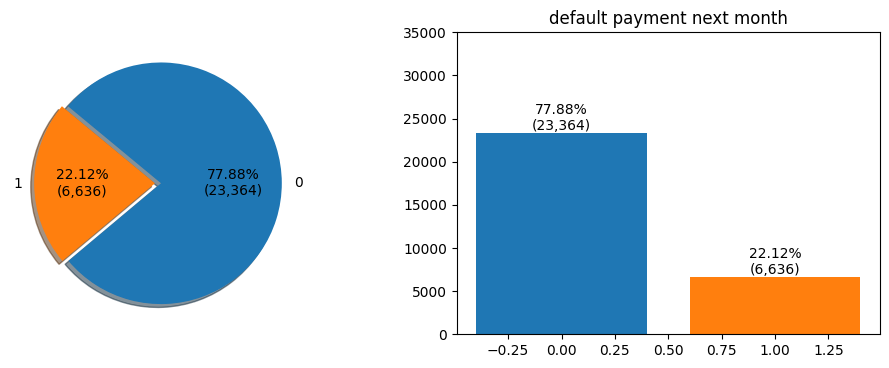

In [29]:
count_data = pd.DataFrame([df["default payment next month"].value_counts(),df["default payment next month"].value_counts(normalize=True)*100]).T
count_data.columns = ["Number_Of_Data", "Percentage_Of_Data"]

display(count_data)

fig, ax = plt.subplots(1,2,figsize= (12, 4), dpi = 100)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

explode = (0, 0.05)

ax[0].pie(
    df["default payment next month"].value_counts(), 
    labels = ["0","1"], 
    autopct = lambda pct : func(pct,df["default payment next month"].value_counts()), 
    shadow = True,
    startangle = 220, 
    explode = explode,
    textprops=dict(color='black')
)

plt.title("default payment next month")

def func1(height):
    total = len(df["default payment next month"])
    pct =((height * 100)/total).round(2)
    return "{:.2f}%\n({:,})".format(pct, height)

g = ax[1].bar(df["default payment next month"].value_counts().index,df["default payment next month"].value_counts(),color=["#1f77b4","#ff7f0e"])

for rect in g:
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2.0, height,func1(height),ha='center', va='bottom')

plt.ylim((0,35000))
    
plt.title("default payment next month")

plt.show()

### **Limit Bal**

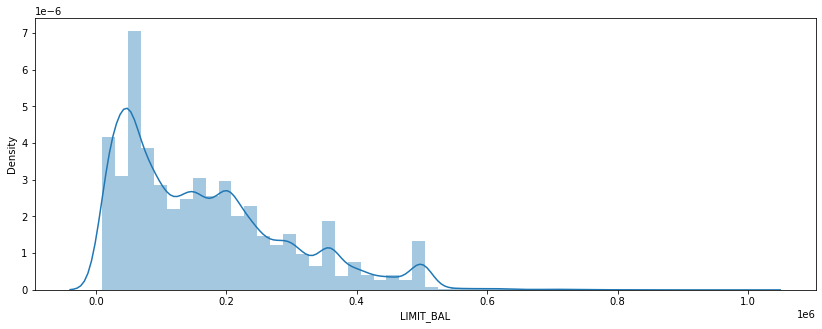

In [14]:
plt.figure(figsize=(14,5))
sns.distplot(df["LIMIT_BAL"])

### **Age**

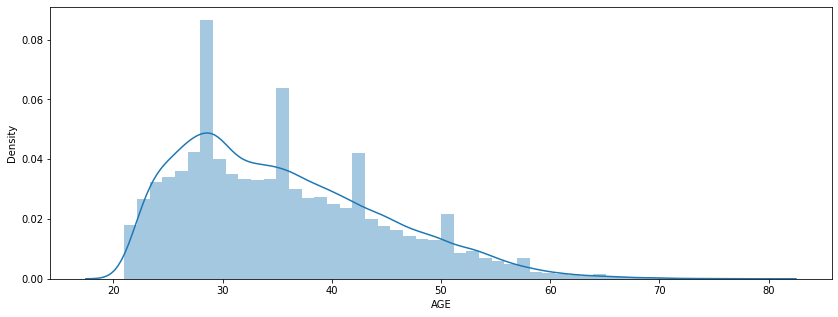

In [15]:
plt.figure(figsize=(14,5))
sns.distplot(df["AGE"])

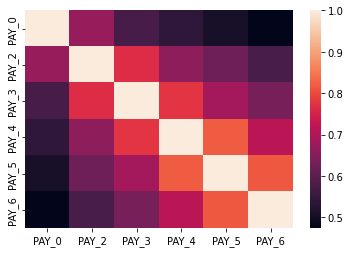

In [22]:
sns.heatmap(df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].corr())

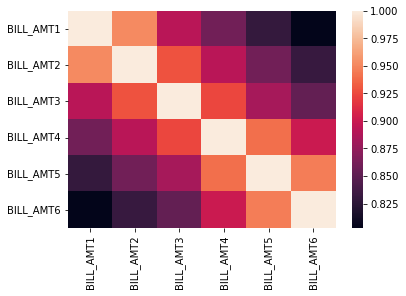

In [23]:
sns.heatmap(df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr())

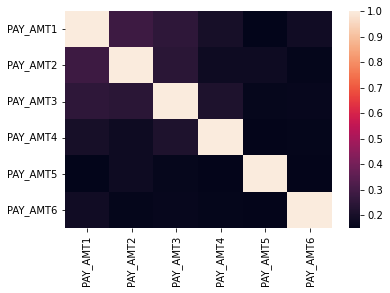

In [24]:
sns.heatmap(df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]].corr())